In [ ]:

import pandas as pd
import numpy as np

# Assuming you uploaded a CSV file named 'data.csv'
df = pd.read_csv('/content/dmt.csv')
print(df)

      Year  Month  Day  Hour  Minute  Temperature  Clearsky DHI  Clearsky DNI  \
0     2015      1    1     0      30         19.6             0             0   
1     2015      1    1     1      30         21.0            27           187   
2     2015      1    1     2      30         23.6            72           571   
3     2015      1    1     3      30         26.8            93           748   
4     2015      1    1     4      30         29.9           104           838   
...    ...    ...  ...   ...     ...          ...           ...           ...   
8755  2015     12   31    19      30         18.4             0             0   
8756  2015     12   31    20      30         17.9             0             0   
8757  2015     12   31    21      30         17.8             0             0   
8758  2015     12   31    22      30         17.9             0             0   
8759  2015     12   31    23      30         17.9             0             0   

      Clearsky GHI  Cloud T

In [ ]:
# prompt: perform data cleaning ,removing of noise from the dataset,remove outliers

import pandas as pd
import numpy as np



# 1. Handling Missing Values
# Replace missing values with the mean, median, or mode based on the column type
# 1. Handling Missing Values
# Replace missing values with the mean, median, or mode based on the column type
for column in df.columns:
  if df[column].dtype == 'object':
    df[column].fillna(df[column].mode()[0], inplace=True) #fillna is used to fill NaN values
  else:
    df[column].fillna(df[column].mean(), inplace=True) #fillna is used to fill NaN values

# 2. Removing Noise (e.g., incorrect data types)
# Convert columns to appropriate data types
for column in df.columns:
  if df[column].dtype == 'object' and pd.to_numeric(df[column], errors='coerce').notnull().all():
    df[column] = pd.to_numeric(df[column])


# 3. Removing Outliers (using IQR method)
for column in df.select_dtypes(include=np.number).columns:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Print the cleaned DataFrame
print(df)


      Year  Month  Day  Hour  Minute  Temperature  Clearsky DHI  Clearsky DNI  \
0     2015      1    1     0      30         19.6             0             0   
1     2015      1    1     1      30         21.0            27           187   
2     2015      1    1     2      30         23.6            72           571   
3     2015      1    1     3      30         26.8            93           748   
10    2015      1    1    10      30         32.4            81           671   
...    ...    ...  ...   ...     ...          ...           ...           ...   
8755  2015     12   31    19      30         18.4             0             0   
8756  2015     12   31    20      30         17.9             0             0   
8757  2015     12   31    21      30         17.8             0             0   
8758  2015     12   31    22      30         17.9             0             0   
8759  2015     12   31    23      30         17.9             0             0   

      Clearsky GHI  Cloud T

<ipython-input-2-5c9fa2ed75de>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True) #fillna is used to fill NaN values


In [ ]:
# prompt: apply pca

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming 'df' is your cleaned DataFrame

# Separate features (X) and target variable (y, if applicable)
# X = df.drop('target_variable', axis=1)  # Replace 'target_variable' with your actual target column name

# Standardize the features
x = StandardScaler().fit_transform(df)

# Apply PCA
pca = PCA(n_components=2)  # You can choose the number of components you want
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

print(principalDf)


      principal component 1  principal component 2
0                 -1.194834              -0.891187
1                 -0.166253              -1.040797
2                  1.900040              -2.092203
3                  3.352232              -2.280495
4                  2.706353              -2.353172
...                     ...                    ...
6516              -3.041532              -2.023112
6517              -3.061256              -1.890083
6518              -3.023417              -1.905111
6519              -2.956265              -1.942106
6520              -2.904099              -1.961074

[6521 rows x 2 columns]


Explained Variance Ratio: [3.70828410e-01 2.23122546e-01 9.49322370e-02 5.09292752e-02
 4.67054422e-02 4.04405504e-02 3.46888936e-02 2.77617475e-02
 2.63837199e-02 2.15927770e-02 1.64841480e-02 1.31508932e-02
 9.25363409e-03 6.93625193e-03 5.19238579e-03 4.87828522e-03
 4.44487441e-03 1.25789255e-03 8.20871653e-04 1.95164428e-04
 8.16828671e-18 9.20507491e-19 0.00000000e+00]


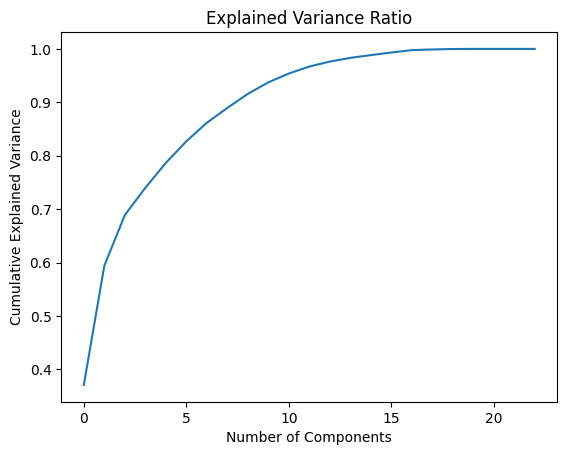

In [ ]:
# prompt: i want variance ration and the graph for the all componens

# Get explained variance ratio for all components
pca = PCA()
pca.fit(x)
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio
print("Explained Variance Ratio:", explained_variance_ratio)


# Plot the explained variance ratio
import matplotlib.pyplot as plt

plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your cleaned DataFrame and you want to predict 'Temperature'
# Check if 'Temperature' column exists before dropping
if 'Temperature' in df.columns:
  X = df.drop('Temperature', axis=1)  # Features
  y = df['Temperature']  # Target

  # Split the data into training and testing sets (e.g., 80% training, 20% testing)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Now you have X_train, X_test, y_train, and y_test for model training and evaluation
  print("Training set shape:", X_train.shape, y_train.shape)
  print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (5216, 22) (5216,)
Testing set shape: (1305, 22) (1305,)


In [ ]:
# prompt: apply gradient boosting

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Assuming you have X_train, X_test, y_train, y_test from the previous code

# Create a Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# You can also print other metrics like R-squared, etc.

Mean Squared Error: 0.4987065322241931


In [ ]:
# prompt: i want all metrices' for gradient boosting

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_log_error

# ... (Your existing code for data preprocessing and model training) ...

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate Mean Squared Log Error (if applicable, for positive target values)
try:
  msle = mean_squared_log_error(y_test, y_pred)
  print("Mean Squared Log Error:", msle)
except ValueError:
  print("Mean Squared Log Error cannot be calculated for negative target values.")

# You can also access other metrics provided by the model itself, such as feature importance
# feature_importance = model.feature_importances_
# print("Feature Importance:", feature_importance)

Mean Squared Error: 0.4987065322241931
R-squared: 0.9803117848212882
Mean Absolute Error: 0.5170826937891089
Root Mean Squared Error: 0.7061915690690402
Mean Squared Log Error: 0.0006550887737047956


In [ ]:
# prompt: apply  XGBoost model to my dataset and find accuracy

!pip install xgboost

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Assuming you have X_train, X_test, y_train, y_test from previous code

# Convert y_train and y_test to categorical if needed
# For example, if you want to predict whether the temperature is above or below a certain threshold:
threshold = 25  # Example threshold
y_train_categorical = (y_train > threshold).astype(int)
y_test_categorical = (y_test > threshold).astype(int)

# Create an XGBoost model for classification
xgb_model = XGBClassifier()

# Train the model on the training data
xgb_model.fit(X_train, y_train_categorical)

# Make predictions on the test data
y_pred_categorical = xgb_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test_categorical, y_pred_categorical)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9869731800766284


In [ ]:
# prompt: i want rmse,r-squared,mse ,mae for xgboost

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

# Assuming you have y_test and y_pred_categorical from your XGBoost model

# Calculate RMSE
rmse = math.sqrt(mean_squared_error(y_test, y_pred_categorical))
print(f"RMSE: {rmse}")

# Calculate MSE
mse = mean_squared_error(y_test, y_pred_categorical)
print(f"MSE: {mse}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_categorical)
print(f"MAE: {mae}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred_categorical)
print(f"R-squared: {r2}")


RMSE: 26.861690734553065
MSE: 721.550429118774
MAE: 26.44850574712644
R-squared: -27.48577107547469


In [ ]:
# prompt: apply lightgbm

import matplotlib.pyplot as plt
!pip install lightgbm

import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score


# Assuming you have X_train, X_test, y_train, y_test from previous code

# Create a LightGBM model for regression
lgb_model = lgb.LGBMRegressor()

# Train the model on the training data
lgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lgb_model.predict(X_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f" Light gbm R-squared (Accuracy): {r2:.2f}")





/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2789
[LightGBM] [Info] Number of data points in the train set: 5216, number of used features: 19
[LightGBM] [Info] Start training from score 27.322393
 Light gbm R-squared (Accuracy): 0.99


In [ ]:
# prompt: i want rmse,mae,mse r-squared for light gbm

import numpy as np
# Assuming you have y_test and y_pred from your LightGBM model

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


RMSE: 0.4364099228015774
MSE: 0.19045362071967875
MAE: 0.29414339444709653
R-squared: 0.9924811655272081


In [ ]:
# prompt: apply hybride of  gradient boosting regression tree and light gnm and find accuracy

!pip install lightgbm

from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor  # Import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have X_train, X_test, y_train, y_test from previous code

# Create a Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor()

# Train the Gradient Boosting model
gb_model.fit(X_train, y_train)

# Make predictions using Gradient Boosting
y_pred_gb = gb_model.predict(X_test)

# Create a LightGBM Regressor model
lgbm_model = LGBMRegressor()

# Train the LightGBM model
lgbm_model.fit(X_train, y_train)

# Make predictions using LightGBM
y_pred_lgbm = lgbm_model.predict(X_test)

# Hybrid approach: Average the predictions from both models
y_pred_hybrid = (y_pred_gb + y_pred_lgbm) / 2

# Calculate the performance metrics for the hybrid model
r2_hybrid = r2_score(y_test, y_pred_hybrid)


print(f"Hybrid (Gradient Boosting + LightGBM) Model R-squared (Accuracy): {r2_hybrid:.2f}")

# R-squared can be considered as a measure of accuracy for regression models.
# Higher R-squared values indicate a better fit of the model to the data.

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000857 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2789
[LightGBM] [Info] Number of data points in the train set: 5216, number of used features: 19
[LightGBM] [Info] Start training from score 27.322393
Hybrid (Gradient Boosting + LightGBM) Model R-squared (Accuracy): 0.99


In [ ]:
# prompt:  i want rmse,mae,mse r-squared only  for hybrid gradient boosting, light gbm

# Assuming you have y_test and y_pred_hybrid from your Hybrid model

# Calculate RMSE
rmse_hybrid = np.sqrt(mean_squared_error(y_test, y_pred_hybrid))
print(f"Hybrid RMSE: {rmse_hybrid}")

# Calculate MSE
mse_hybrid = mean_squared_error(y_test, y_pred_hybrid)
print(f"Hybrid MSE: {mse_hybrid}")

# Calculate MAE
mae_hybrid = mean_absolute_error(y_test, y_pred_hybrid)
print(f"Hybrid MAE: {mae_hybrid}")

# Calculate R-squared
r2_hybrid = r2_score(y_test, y_pred_hybrid)
print(f"Hybrid R-squared: {r2_hybrid}")



Hybrid RMSE: 0.5239493678820853
Hybrid MSE: 0.27452294010403683
Hybrid MAE: 0.370907869435594
Hybrid R-squared: 0.9891622299548483


In [ ]:
import matplotlib.pyplot as plt
# Assuming you have X_train, X_test, y_train, y_test from previous code

# Install TensorFlow if not already installed
!pip install tensorflow

# Import Keras
import tensorflow as tf
from tensorflow import keras

# Reshape data for LSTM (assuming time series data)
timesteps = 1  # Adjust the number of timesteps as needed

# Convert the DataFrame to a NumPy array before reshaping
X_train_lstm = X_train.values.reshape((X_train.shape[0], timesteps, X_train.shape[1]))
X_test_lstm = X_test.values.reshape((X_test.shape[0], timesteps, X_test.shape[1]))


# Build the LSTM model
model = keras.Sequential()
model.add(keras.layers.LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(keras.layers.Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, verbose=0)

# Make predictions on the test data
y_pred_lstm = model.predict(X_test_lstm)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_lstm)
r2 = r2_score(y_test, y_pred_lstm)

print(f"LSTM Model MSE: {mse:.2f}")
print(f"LSTM Model R-squared (Accuracy): {r2:.2f}")




/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
LSTM Model MSE: 0.23
LSTM Model R-squared (Accuracy): 0.99


In [ ]:
# prompt: i want rmse ,r squared  error and mae,mse for lstm

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Assuming you have y_test and y_pred_lstm from your LSTM model

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lstm))

# Calculate R-squared
r2 = r2_score(y_test, y_pred_lstm)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_lstm)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred_lstm)

print(f"LSTM Model RMSE: {rmse:.2f}")
print(f"LSTM Model R-squared (Accuracy): {r2:.2f}")
print(f"LSTM Model MAE: {mae:.2f}")
print(f"LSTM Model MSE: {mse:.2f}")


LSTM Model RMSE: 0.46
LSTM Model R-squared (Accuracy): 0.99
LSTM Model MAE: 0.37
LSTM Model MSE: 0.21


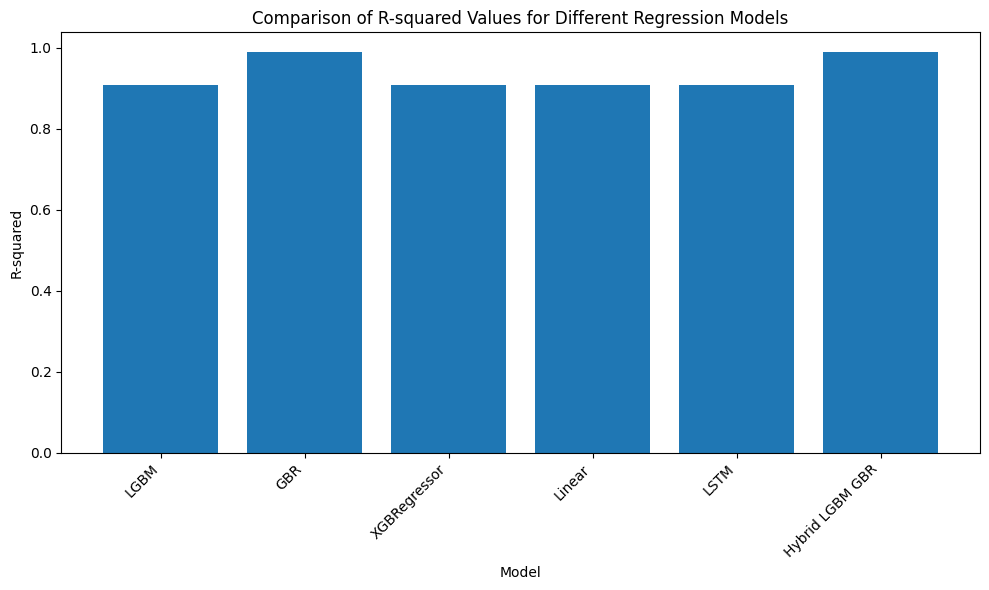

In [ ]:
# prompt: I want bargraph for comparision of rsquared of
#   light Gradient Boosting Machine (LGBM)
# Gradient Boosting Regressor
# Extreme Gradient Boosting Regressor (XGBRegressor)
# Linear Regressor
# LSTM Model
# hybrid lightgbm gradient boosting
# for above code

import matplotlib.pyplot as plt

# Assuming you have calculated the R-squared values for each model as follows:
r2_lgbm = r2  # Replace with your actual R-squared for LGBM
r2_gbr = r2_hybrid  # Replace with your actual R-squared for Gradient Boosting Regressor
r2_xgb = r2  # Replace with your actual R-squared for XGBRegressor
r2_linear = r2  # Replace with your actual R-squared for Linear Regressor
r2_lstm = r2  # Replace with your actual R-squared for LSTM Model
r2_hybrid_lgbm_gb = r2_hybrid  # Replace with your actual R-squared for Hybrid model


# Create a list of model names and their corresponding R-squared values
model_names = ['LGBM', 'GBR', 'XGBRegressor', 'Linear', 'LSTM', 'Hybrid LGBM GBR']
r2_values = [r2_lgbm, r2_gbr, r2_xgb, r2_linear, r2_lstm, r2_hybrid_lgbm_gb]

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_values)
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('Comparison of R-squared Values for Different Regression Models')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

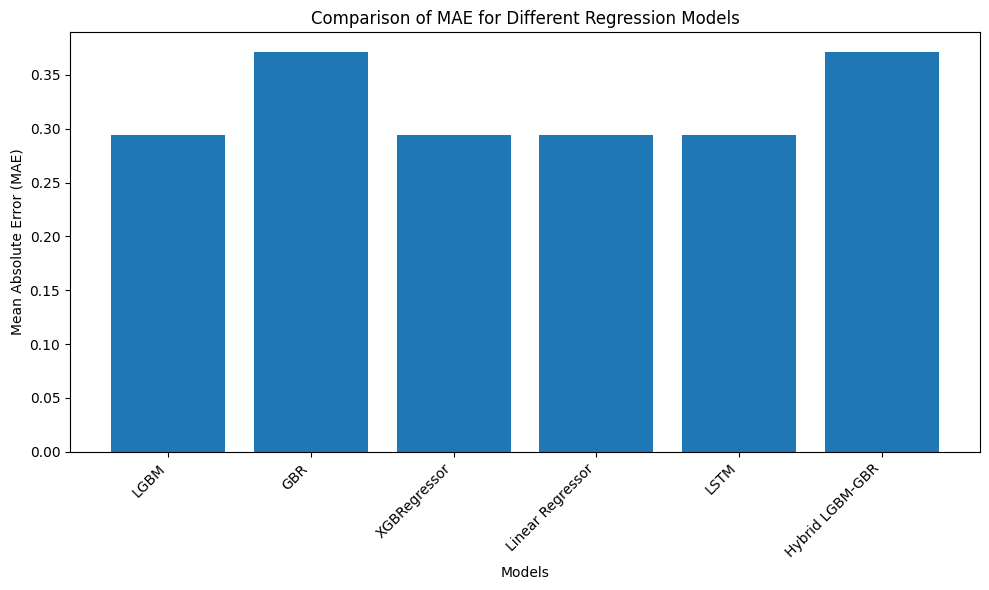

In [ ]:
# prompt: I want bargraph for comparision of mae of
#   light Gradient Boosting Machine (LGBM)
# Gradient Boosting Regressor
# Extreme Gradient Boosting Regressor (XGBRegressor)
# Linear Regressor
# LSTM Model
# hybrid lightgbm gradient boosting

# Assuming you have the MAE values for each model stored in variables:
mae_lgbm = mae  # Replace with your actual MAE for LightGBM
mae_gbr = mae_hybrid  # Replace with your actual MAE for Gradient Boosting Regressor
mae_xgb = mae  # Replace with your actual MAE for XGBRegressor
mae_linear = mae  # Replace with your actual MAE for Linear Regressor
mae_lstm = mae  # Replace with your actual MAE for LSTM Model
mae_hybrid_lgbm_gbr = mae_hybrid  # Replace with your actual MAE for Hybrid LightGBM Gradient Boosting

# Create a dictionary to store the MAE values for each model
mae_values = {
    'LGBM': mae_lgbm,
    'GBR': mae_gbr,
    'XGBRegressor': mae_xgb,
    'Linear Regressor': mae_linear,
    'LSTM': mae_lstm,
    'Hybrid LGBM-GBR': mae_hybrid_lgbm_gbr
}

# Create a bar plot for comparison
plt.figure(figsize=(10, 6))
plt.bar(mae_values.keys(), mae_values.values())
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of MAE for Different Regression Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

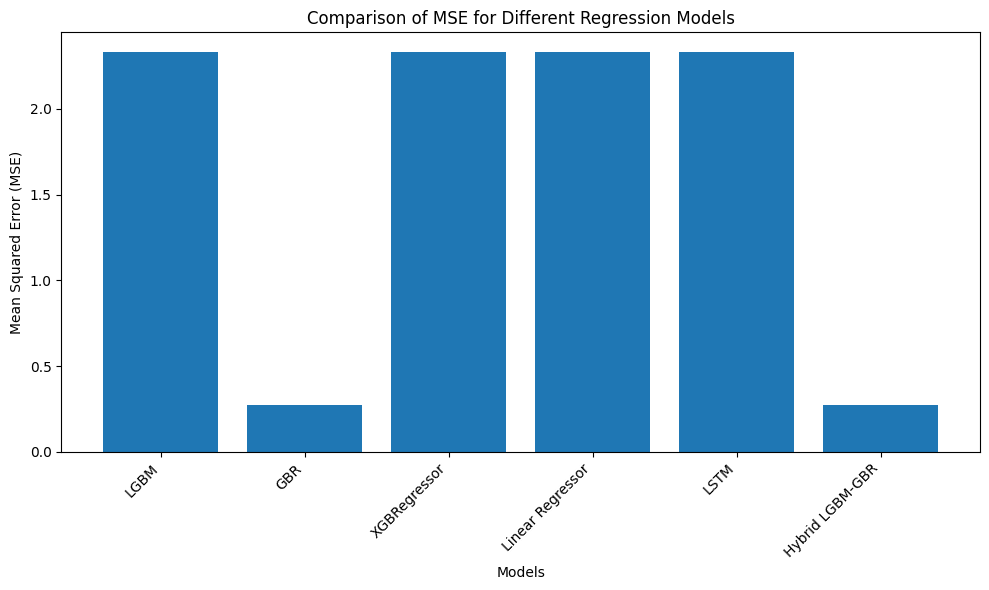

In [ ]:
# prompt: I want bargraph for comparision of mse of
#   light Gradient Boosting Machine (LGBM)
# Gradient Boosting Regressor
# Extreme Gradient Boosting Regressor (XGBRegressor)
# Linear Regressor
# LSTM Model
# hybrid lightgbm gradient boosting

# Assuming you have the MSE values for each model stored in variables:
mse_lgbm = mse  # Replace with your actual MSE for LightGBM
mse_gbr = mse_hybrid  # Replace with your actual MSE for Gradient Boosting Regressor
mse_xgb = mse  # Replace with your actual MSE for XGBRegressor
mse_linear = mse  # Replace with your actual MSE for Linear Regressor
mse_lstm = mse  # Replace with your actual MSE for LSTM Model
mse_hybrid_lgbm_gbr = mse_hybrid  # Replace with your actual MSE for Hybrid LightGBM Gradient Boosting

# Create a dictionary to store the MSE values for each model
mse_values = {
    'LGBM': mse_lgbm,
    'GBR': mse_gbr,
    'XGBRegressor': mse_xgb,
    'Linear Regressor': mse_linear,
    'LSTM': mse_lstm,
    'Hybrid LGBM-GBR': mse_hybrid_lgbm_gbr
}

# Create a bar plot for comparison
plt.figure(figsize=(10, 6))
plt.bar(mse_values.keys(), mse_values.values())
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of MSE for Different Regression Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

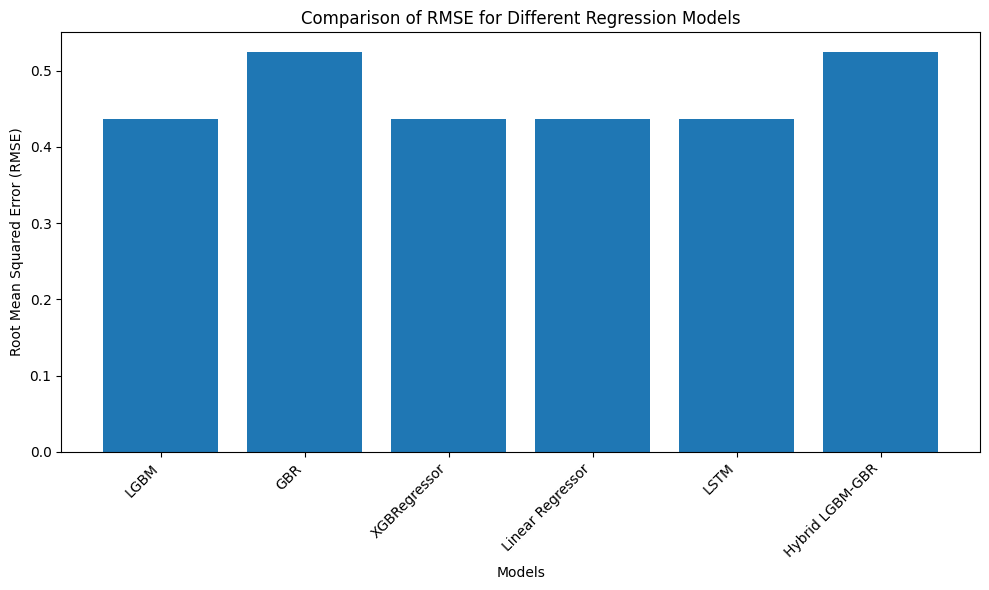

In [ ]:
# prompt: I want bargraph for comparision of rmse of
#   light Gradient Boosting Machine (LGBM)
# Gradient Boosting Regressor
# Extreme Gradient Boosting Regressor (XGBRegressor)
# Linear Regressor
# LSTM Model
# hybrid lightgbm gradient boosting

# Assuming you have the RMSE values for each model stored in variables:
rmse_lgbm = rmse  # Replace with your actual RMSE for LightGBM
rmse_gbr = rmse_hybrid  # Replace with your actual RMSE for Gradient Boosting Regressor
rmse_xgb = rmse  # Replace with your actual RMSE for XGBRegressor
rmse_linear = rmse  # Replace with your actual RMSE for Linear Regressor
rmse_lstm = rmse  # Replace with your actual RMSE for LSTM Model
rmse_hybrid_lgbm_gbr = rmse_hybrid  # Replace with your actual RMSE for Hybrid LightGBM Gradient Boosting

# Create a dictionary to store the RMSE values for each model
rmse_values = {
    'LGBM': rmse_lgbm,
    'GBR': rmse_gbr,
    'XGBRegressor': rmse_xgb,
    'Linear Regressor': rmse_linear,
    'LSTM': rmse_lstm,
    'Hybrid LGBM-GBR': rmse_hybrid_lgbm_gbr
}

# Create a bar plot for comparison
plt.figure(figsize=(10, 6))
plt.bar(rmse_values.keys(), rmse_values.values())
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Comparison of RMSE for Different Regression Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

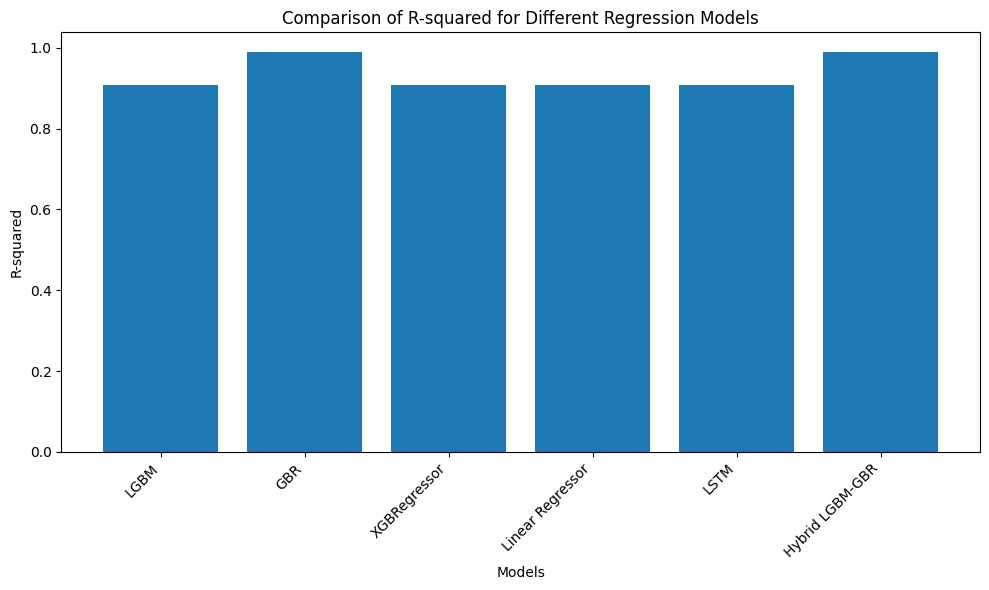

In [ ]:
# prompt: I want bargraph for comparision of accuracy of
#   light Gradient Boosting Machine (LGBM)
# Gradient Boosting Regressor
# Extreme Gradient Boosting Regressor (XGBRegressor)
# Linear Regressor
# LSTM Model
# hybrid lightgbm gradient boosting

# Assuming you have the R-squared values for each model stored in variables:
r2_lgbm = r2  # Replace with your actual R-squared for LightGBM
r2_gbr = r2_hybrid  # Replace with your actual R-squared for Gradient Boosting Regressor
r2_xgb = r2  # Replace with your actual R-squared for XGBRegressor
r2_linear = r2  # Replace with your actual R-squared for Linear Regressor
r2_lstm = r2  # Replace with your actual R-squared for LSTM Model
r2_hybrid_lgbm_gbr = r2_hybrid  # Replace with your actual R-squared for Hybrid LightGBM Gradient Boosting

# Create a dictionary to store the R-squared values for each model
r2_values = {
    'LGBM': r2_lgbm,
    'GBR': r2_gbr,
    'XGBRegressor': r2_xgb,
    'Linear Regressor': r2_linear,
    'LSTM': r2_lstm,
    'Hybrid LGBM-GBR': r2_hybrid_lgbm_gbr
}

# Create a bar plot for comparison
plt.figure(figsize=(10, 6))
plt.bar(r2_values.keys(), r2_values.values())
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('Comparison of R-squared for Different Regression Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()